# Linear Regression Project

#### DataVision has been contracted to analyse the user enagement for the CandyMarch mobile game and the score they achieve during a one week period. 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import math


from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn import metrics

**Visualizing the data as a scatter-plot**

In [3]:
df = pd.read_csv("Dataset/candyMarch.csv")
df.head()

,Hours,Score
0,9.080959,185.462079
1,3.758313,127.119285
2,1.376179,81.351604
3,0.726663,34.671634
4,3.835287,123.694822


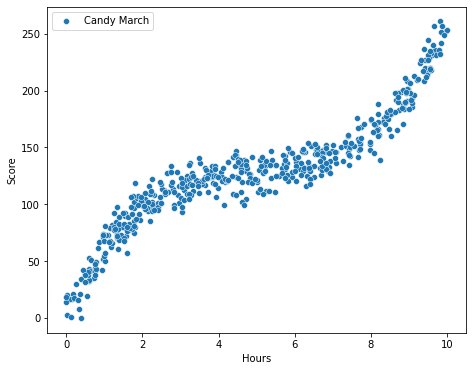

In [4]:
plt.figure(figsize=(7.5,6))
ax = sns.scatterplot(x="Hours", y="Score", data=df, label="Candy March")

**Splitting the data into training and testing sets using 90% for training and 10% for testing.**

In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(df['Hours'], df['Score'], test_size=0.1, shuffle=True)

**Training a linear regression model to determine the "line of best fit" for the training data**

In [6]:
lr = linear_model.LinearRegression()
lr.fit(X=np.array(xTrain).reshape(-1,1), y=yTrain)

LinearRegression()

In [7]:
# Equation of the linear regression model
print(f"Score = %.3f Hours + %.3f" % (lr.coef_, lr.intercept_))

Score = 15.997 Hours + 50.901


**Predicting the score for the data within the testing set**

In [8]:
predicted = lr.predict(xTest.to_numpy().reshape(-1,1))

**Calculating 𝑅2, Mean Absolute Error, Mean Squared Error and Root Mean Squared Error of this linear regression model for the testing set.**

$$R^2 \approx \frac{Var[Predicted]}{Var[Original]}$$
$$R^2 = 1 - \frac{\sum (TrueValue - PredictedValue)^2}{\sum (PredictedValue - MeanTrue)^2}$$

In [9]:
mae = metrics.mean_absolute_error(y_true=yTest, y_pred=predicted)
mse = metrics.mean_squared_error(y_true=yTest, y_pred=predicted)
rmse = math.sqrt(mse)
r_2 = metrics.r2_score(y_true=yTest, y_pred=predicted)

r_2, mae, mse, rmse

(0.8302771818907768,
 15.250454280934639,
 355.39085624251925,
 18.851813075736754)

**Visualizing the linear regression model alongside the scatter plot for the testing set.**

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


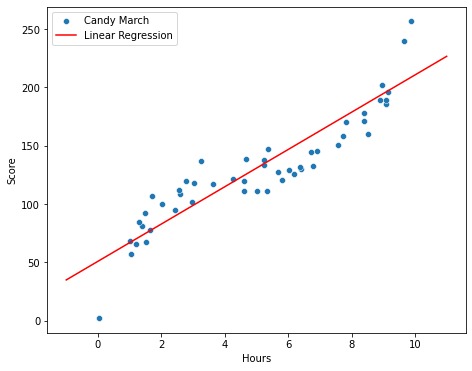

In [10]:
plt.figure(figsize=(7.5,6))
dfTest = pd.DataFrame(data={"Hours":xTest, "Score":yTest})
ax = sns.scatterplot(x="Hours", y="Score", data=dfTest, label="Candy March")

x_min = df['Hours'].min()-1
x_max = df['Hours'].max()+1

y_range = lr.predict([[x_min], [x_max]])
ax = sns.lineplot([x_min, x_max], y_range, label="Linear Regression", color='r')

**Adjusting the degree of the previous Model**

Since the above model doesn't describe the model accurately change the degree of the feature to 2 to check for better model

In [11]:
deg = 2
polyDegree = PolynomialFeatures(degree=deg)

#Transform the data
xTrainPoly = polyDegree.fit_transform(xTrain.to_numpy().reshape(-1,1))
xTestPoly  = polyDegree.transform(xTest.to_numpy().reshape(-1,1))

#Train the polynomial model
lrPoly2 = linear_model.LinearRegression()
lrPoly2.fit(xTrainPoly, yTrain)

LinearRegression()

**Calculating 𝑅2, Mean Absolute Error, Mean Squared Error and Root Mean Squared Error for the testing set.**

In [12]:
yTestPredictPoly2 = lrPoly2.predict(xTestPoly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_true=yTest, y_pred=yTestPredictPoly2))
print('Mean Squared Error:', metrics.mean_squared_error(y_true=yTest, y_pred=yTestPredictPoly2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true=yTest, y_pred=yTestPredictPoly2)))
print('R2 (sklearn ):', metrics.r2_score(yTest, yTestPredictPoly2))

Mean Absolute Error: 15.207124936486819
Mean Squared Error: 351.7138595977921
Root Mean Squared Error: 18.754035821598297
R2 (sklearn ): 0.8320331928341067


**Visualizing the polynomial regression model of degree 2 alongside the linear regression model and the scatter plot for the testing set.**

<AxesSubplot:xlabel='Hours', ylabel='Score'>

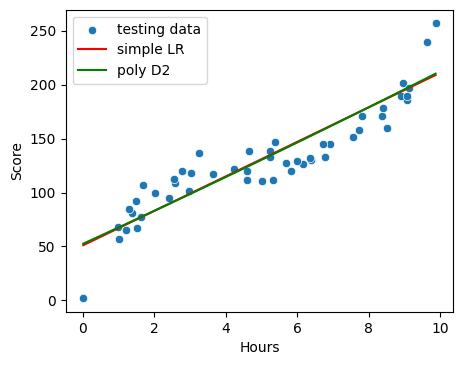

In [13]:
plt.figure(figsize=(5,4), dpi=100)
ax = sns.scatterplot(x='Hours', y='Score', data=dfTest, label='testing data')

sns.lineplot(x=xTest, y=predicted, color='r', label='simple LR')
sns.lineplot(x=xTest, y=yTestPredictPoly2, color='g', label='poly D2')

**Checking for degree 3**

In [14]:
polyDegree3 = PolynomialFeatures(degree=3)

xTrainPoly3 = polyDegree3.fit_transform(xTrain.to_numpy().reshape(-1,1))
xTestPoly3 = polyDegree3.transform(xTest.to_numpy().reshape(-1,1))

lrPoly3 = linear_model.LinearRegression()

lrPoly3.fit(xTrainPoly3, yTrain)

LinearRegression()

In [15]:
predictPoly3 = lrPoly3.predict(xTestPoly3)

r_2 = metrics.r2_score(yTest, predictPoly3)
mae = metrics.mean_absolute_error(yTest, predictPoly3)
rmse = math.sqrt(metrics.mean_squared_error(yTest, predictPoly3))

r_2, mae, rmse

(0.9527964312311639, 8.358347325667443, 9.941923678319295)

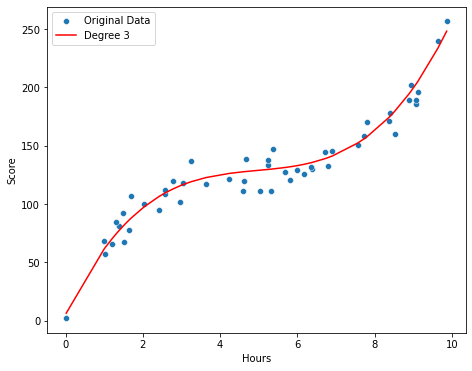

In [16]:
plt.figure(figsize=(7.5, 6))

ax = sns.scatterplot(x="Hours", y="Score", data=dfTest, label="Original Data")
ax = sns.lineplot(x=xTest, y=predictPoly3, label="Degree 3", color='r')


**Writing a function trainAndPlotPolynomials(datasetX, datasetY, percentageTrain, polyDegrees) where**

* datasetX: data of the indepedent variable
* datasetY: data of the   depedent variable
* percentageTrain: percentage of data that should be used for training
* polyDegree: degree with which the regression must be trained

r_2: 0.954
mae: 7.639
rmse: 9.349


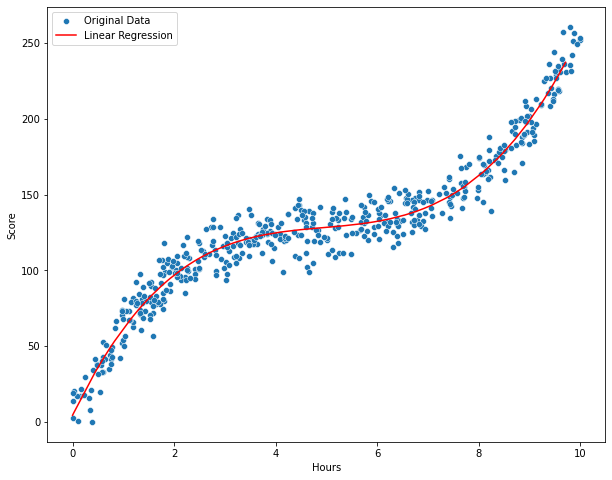

In [17]:
def trainAndPlotPolynomials(datasetX, datasetY, percentageTrain, polyDegree):
    # Splitting the dataset
    xTrain, xTest, yTrain, yTest = train_test_split(datasetX, datasetY, test_size=(1-(percentageTrain/100)))

    # Transforming the data to poly degree
    polyFeature = PolynomialFeatures(degree=polyDegree)
    xTrainPoly = polyFeature.fit_transform(xTrain.to_numpy().reshape(-1,1))
    xTestPoly = polyFeature.transform(xTest.to_numpy().reshape(-1,1))

    # creating linear regressions
    lr = linear_model.LinearRegression()
    lr.fit(xTrainPoly, yTrain)

    # predicting values for test
    predicted = lr.predict(xTestPoly)

    # Calculating metrics
    mae = metrics.mean_absolute_error(yTest, predicted)
    rmse = math.sqrt(metrics.mean_squared_error(yTest, predicted))
    r_2 = metrics.r2_score(yTest, predicted)

    label = [f"r_2: %.3f" % (r_2), f"mae: %.3f" % (mae), f"rmse: %.3f" %(rmse)]
    for i in label:     print(i)

    # Showing the plots
    plt.figure(figsize=(10, 8))

    ax = sns.scatterplot(x=datasetX, y=datasetY, label="Original Data")

    ax.set_xlabel("Hours")
    ax.set_ylabel("Score")

    ax = sns.lineplot(x=xTest.to_numpy(), y=predicted, color='r', label='Linear Regression')


# percentageTrain = float(input("Enter percentage of training set: "))
# polyDegree = int(input("Enter degree of linear regression: "))
percentageTrain = 80
polyDegree = 4
trainAndPlotPolynomials(df['Hours'], df['Score'], percentageTrain, polyDegree)